<a href="https://colab.research.google.com/github/RaulAtLehigh/CSE337_P1/blob/main/lab2_mdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Markov Decision Problems

# Exercise 1: Grid World
Compute the value funnction for the example 4.1 in the book.







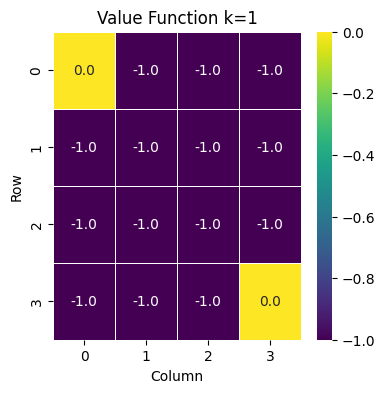

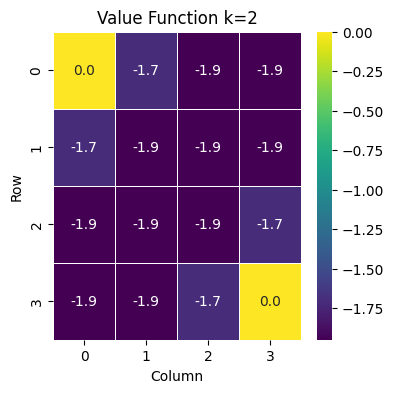

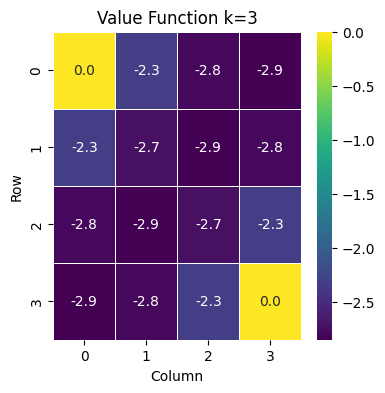

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

V = np.zeros(16)
gamma = 0.95
V_old = np.zeros(16)

# Reward and transition probabilities
R = -1
P = 0.25

for k in range(3):
    V_old = V.copy()

    for s in range(16):
        if s == 0 or s == 15:
            continue

        aggregate = 0

        # Possible next states for each action
        # The agent stays in the same state if the action takes it off the grid.
        up = s - 4 if s >= 4 else s
        down = s + 4 if s <= 11 else s
        left = s - 1 if s % 4 != 0 else s
        right = s + 1 if s % 4 != 3 else s

        # Update value function for current state
        # Each action has a 0.25 probability

        aggregate += P * (R + (gamma * V_old[up]))
        aggregate += P * (R + (gamma * V_old[down]))
        aggregate += P * (R + (gamma * V_old[left]))
        aggregate += P * (R + (gamma * V_old[right]))

        V[s] = aggregate

    # Plotting code remains the same
    # Reshape the 1D value function array into a 4x4 grid
    V_grid = V.reshape((4, 4))

    # Plot the value function as a heatmap
    plt.figure(figsize=(4, 4))
    sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
    plt.title("Value Function k=%d" % (k + 1))
    plt.xlabel("Column")
    plt.ylabel("Row")
    plt.show()

# Exercise 2: Grid World
Compute the optimal policy




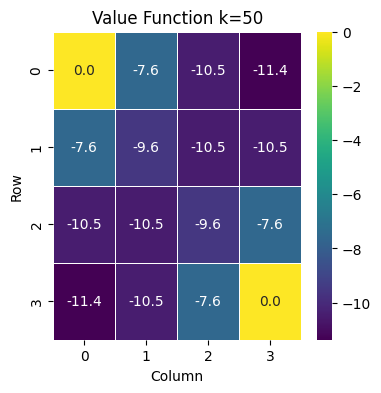

['', 'left', 'left', 'down', 'up', 'up', 'down', 'down', 'up', 'up', 'right', 'down', 'up', 'right', 'right', '']

Optimal Policy Grid:
['Goal ', 'left ', 'left ', 'down ']
['up   ', 'up   ', 'down ', 'down ']
['up   ', 'up   ', np.str_('right'), 'down ']
['up   ', np.str_('right'), np.str_('right'), 'Goal ']


In [13]:
V = np.zeros(16)
gamma = 0.95
V_old = np.zeros(16)

# Reward and transition probabilities
R = -1
P = 0.25
k = 1
while(k < 50):
    k += 1
    V_old = V.copy()

    for s in range(16):
        if s == 0 or s == 15:
            continue

        aggregate = 0

        # Possible next states for each action
        # The agent stays in the same state if the action takes it off the grid.
        up = s - 4 if s >= 4 else s
        down = s + 4 if s <= 11 else s
        left = s - 1 if s % 4 != 0 else s
        right = s + 1 if s % 4 != 3 else s

        # Update value function for current state
        # Each action has a 0.25 probability

        aggregate += P * (R + (gamma * V_old[up]))
        aggregate += P * (R + (gamma * V_old[down]))
        aggregate += P * (R + (gamma * V_old[left]))
        aggregate += P * (R + (gamma * V_old[right]))

        V[s] = aggregate


# Plotting code remains the same
# Reshape the 1D value function array into a 4x4 grid
V_grid = V.reshape((4, 4))

    # Plot the value function as a heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(V_grid, annot=True, cmap="viridis", fmt=".1f", linewidths=.5)
plt.title("Value Function k=%d" % (k))
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

policy = [""] * 16
# mapping 0 - up, 1 - down, 2 - left, 3 - right
policyMap = [["up", "down", "left", "right"],
             [0,0,0,0]]

for s in range(16):
  if s == 0 or s == 15: # Terminal conditions
    continue

  up = V[s - 4] if s >= 4 else float('-inf')
  down = V[s + 4] if s <= 11 else float('-inf')
  left = V[s - 1] if s % 4 != 0 else float('-inf')
  right = V[s + 1] if s % 4 != 3 else float('-inf')

  policyMap[1] = [up, down, left, right]
  policy[s] = policyMap[0][np.argmax(policyMap[1])]


print(policy)
print("\nOptimal Policy Grid:")

# Create a 4x4 grid from the policy list for easy printing
policy_grid = np.array(policy).reshape(4, 4)

# Replace terminal states with a clear label for readability
policy_grid[0, 0] = "Goal"
policy_grid[3, 3] = "Goal"

# Print each row of the grid
for row in policy_grid:
    print([f"{action:<5}" for action in row])




# Exercise 3: Grid World
In the following gym environment, compute the value function using Monte Carlo.

Run the following code in your local machine. You can run in on colab, but you will not see the animation.

In [ ]:
## Install https://github.com/damat-le/gym-simplegrid
!pip install gym_simplegrid

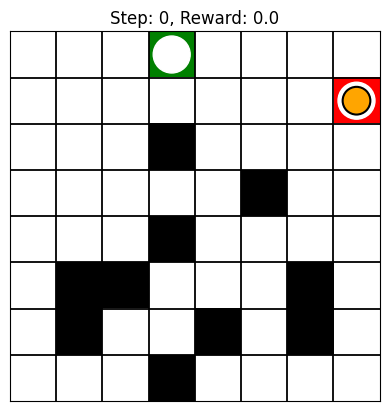

Location (1,6) t=0 reward=0.0
Location (1,7) t=1 reward=0.0
Location (2,7) t=2 reward=0.0
Location (3,7) t=3 reward=0.0
Location (3,6) t=4 reward=0.0
Location (2,6) t=5 reward=0.0
Location (2,5) t=6 reward=0.0
Location (2,5) t=7 reward=-1.0
Location (2,4) t=8 reward=0.0
Location (1,4) t=9 reward=0.0


In [ ]:

import gymnasium as gym
import gym_simplegrid

START_LOC = 15
GOAL_LOC = 3
# Define the initial location and the goal location in the grid.
# Each grid cell has an a number from 0 to 63.
options ={
    'start_loc': START_LOC,
    'goal_loc': GOAL_LOC
}

env = gym.make('SimpleGrid-8x8-v0', render_mode='human')
obs, info = env.reset(seed=1, options=options)
done = env.unwrapped.done

for t in range(10):
    if done:
        break
    action = env.action_space.sample()   # Random action
    obs, reward, done, _, info = env.step(action)

    grid_size = 8
    row = obs // grid_size
    col = obs % grid_size
    print("Location (", row, ",", col, ") t=",t, " reward=", reward, sep="")

# env.close()